In [30]:
from os import path as osp
import cv2
import numpy as np
import util

In [26]:
N = 15

DATA_DIR = 'data'
HDR_DATA_DIR = osp.join(DATA_DIR, 'hdr')
LDR_DATA_DIR = osp.join(DATA_DIR, 'ldr', 'N' + str(N))

In [60]:
def load_hdr(fname):
    try:
        hdr = util.imread(osp.join(HDR_DATA_DIR, fname + '.pfm'), dtype=np.float64)
    except Exception:
        try:
            hdr = util.imread(osp.join(HDR_DATA_DIR, fname + '.hdr'), dtype=np.float64)
        except Exception:
            raise FileNotFoundError('No such file: {}.'.format(osp.join(HDR_DATA_DIR, fname + '(.pfm)(.hdr)')))

    return hdr

def hd_race(hdr, rsr, nrrsr, nrace):
    blurred = cv2.GaussianBlur(hdr, (5, 5), 0)
    log_lum = util.to_log_lum(blurred, zero_origin=True)

    sb = 1 / 2
    sg = 2 / 5
    beta = util.gaussian(log_lum, np.max(log_lum), sb * np.max(log_lum))
    gamma = util.gaussian(log_lum, np.max(log_lum), sg * sb * np.max(log_lum))

    hdrsr = util.convex_comb(rsr, nrrsr, alpha=gamma)
    hdrace = util.convex_comb(hdrsr, nrace, alpha=beta)
    hdrsr = util.to_uint8(hdrsr)
    hdrace = util.to_uint8(hdrace)

    return hdrace, hdrsr, beta, gamma

In [54]:
fname = 'tinterna'
hdr = load_hdr(fname)
rsr = util.imread(osp.join(LDR_DATA_DIR, 'rsr_' + fname + '.png'), dtype=np.uint8)
nrrsr = util.imread(osp.join(LDR_DATA_DIR, 'nr_rsr_' + fname + '.png'), dtype=np.uint8)
nrace = util.imread(osp.join(LDR_DATA_DIR, 'ace_' + fname + '.png'), dtype=np.uint8)

blurred = cv2.GaussianBlur(hdr, (5, 5), 0)
log_lum = util.to_log_lum(blurred, zero_origin=True)

sb = 1 / 2
sg = 2 / 5
beta = util.gaussian(log_lum, np.max(log_lum), sb * np.max(log_lum))
gamma = util.gaussian(log_lum, np.max(log_lum), sg * sb * np.max(log_lum))

### RSR

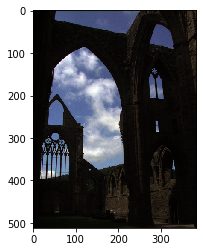

In [55]:
plt.figure()
plt.imshow(rsr)
plt.show()

### NR-RSR

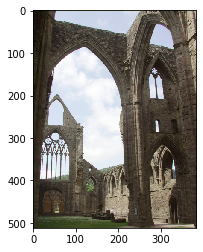

In [56]:
plt.figure()
plt.imshow(nrrsr)
plt.show()

### NR-ACE

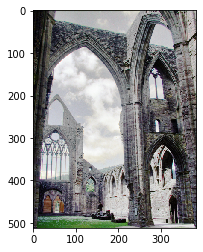

In [57]:
plt.figure()
plt.imshow(nrace)
plt.show()

In [61]:
hdrace, hdrsr, beta, gamma = hd_race(hdr, rsr, nrrsr, nrace)

### HR-RSR

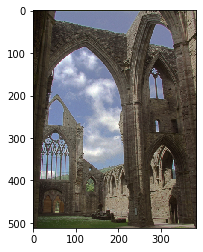

In [63]:
plt.figure()
plt.imshow(hdrsr)
plt.show()

### HD-RACE

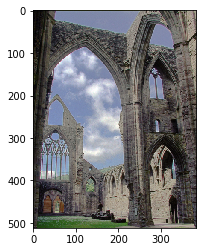

In [64]:
plt.figure()
plt.imshow(hdrace)
plt.show()

### Log luminance

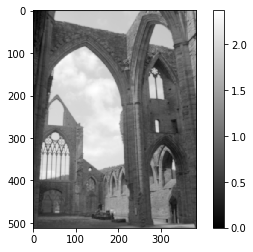

In [67]:
plt.figure()
plt.imshow(log_lum.squeeze(), cmap='gray')
plt.colorbar()
plt.show()

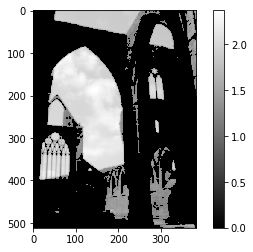

In [72]:
ll1 = log_lum.copy().squeeze()
ll1[ll1 < sb * ll[-1]] = 0
plt.figure()
plt.imshow(ll1, cmap='gray')
plt.colorbar()
plt.show()

In [46]:
ll = np.sort(log_lum.flatten())

In [35]:
import matplotlib.pyplot as plt

/home/kkoscevic/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


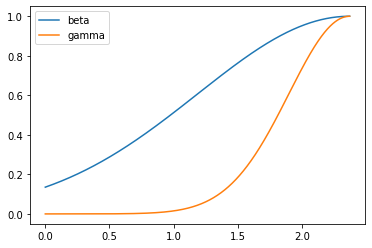

In [51]:
plt.figure()
plt.plot(ll.squeeze(), util.gaussian(ll, ll[-1], sb * ll[-1]), label='beta')
plt.plot(ll.squeeze(), util.gaussian(ll, ll[-1], sg * sb * ll[-1]), label='gamma')
plt.legend()
plt.show()